# Multi Class Classification Reuters

#### Notebook configurations

In [6]:
from IPython.display import display, HTML

display(HTML("<style>.container { width: 100% !important;}</style>"))

#### Library Imports

In [57]:
import numpy as np
import matplotlib.pyplot as plt


from keras import models, layers
from keras.datasets import reuters

#### Info about Reuters dataset

    
    This is a dataset of 11,228 newswires from Reuters, labeled over 46 topics.

    This was originally generated by parsing and preprocessing the classic
    Reuters-21578 dataset, but the preprocessing code is no longer packaged
    with Keras. See this
    [github discussion](https://github.com/keras-team/keras/issues/12072)
    for more info.

    Each newswire is encoded as a list of word indexes (integers).
    For convenience, words are indexed by overall frequency in the dataset,
    so that for instance the integer "3" encodes the 3rd most frequent word in
    the data. This allows for quick filtering operations such as:
    "only consider the top 10,000 most
    common words, but eliminate the top 20 most common words".

    As a convention, "0" does not stand for a specific word, but instead is used
    to encode any unknown word.


In [9]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000
)

2121728/2110848 [==============================] - 0s 0us/step


The `num_words=10000` restricts the dataset to the `10,000` most frequently occurring words found in the data.
Let's check the size of `train` and `test` data

In [10]:
len(train_data), len(test_data)

(8982, 2246)

How many unique classes in labels?

In [36]:
len(set(train_labels)), len(set(test_labels))

(46, 46)

In [15]:
len(train_data[12]), train_data[12][:5]

(65, [1, 2, 81, 8, 16])

### Decoding a newswire

In [26]:
word_index = reuters.get_word_index()
reversed_word_index = {v: k for k, v in word_index.items()}


def decode_newswire(encoded_data):
    return " ".join([reversed_word_index.get(i - 3, "?") for i in encoded_data])

In [28]:
decode_newswire(train_data[30])

'? the u s agriculture department said private u s exporters reported sales of 200 000 tonnes of wheat to jordan 300 000 tonnes of soybean meal to iraq and 100 000 tonnes of corn to algeria the wheat for jordan includes 165 000 tonnes of hard red winter and 35 000 tonnes of soft red winter and is for delivery during the 1987 88 marketing year the soybean meal sales to iraq includes 180 000 tonnes for delivery during the 1986 87 season and 120 000 tonnes during the 1987 88 season the department said the 100 000 tonnes of corn sales to algeria are for delivery during the 1986 87 season it said the marketing year for wheat begins june 1 corn september 1 and soybean meal october 1 reuter 3'

In [29]:
train_labels[30]

1

### Encoding the data

- Our training data is in the form of list of integers which can feed to the neural network
- The network wants `tensors` so we need to do the encoding
- We'll do one hot encoding of binary integers where each sample has a length of `10000`
- So for each index of integer present in training data the corresponding binary index will be `1` else `0`
- Similarly let's one hot encode the training and test labels as well

In [39]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

Vectorize `Train` and `Test` data

In [41]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [42]:
one_hot_train_labels = vectorize_sequences(train_labels, dimension=46)
one_hot_test_labels = vectorize_sequences(test_labels, dimension=46)

### Model Architecture

Since we are dealing with `multi-class` classification of `46` categories we need layers that have sufficent dimensions
to hold and pass on the representations in the data to successive layers.
Let's use a stack of `dense` layers with `64` neurons

In [49]:
model = models.Sequential()

model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

- We end the last layer with a size of `46`. 
- This means that for each input sample the network will compute a vector of size `46` which are the total number of `classes`
- Each number in the output vector defines the probability that the input belongs to the respective class
- So we get a probability distribution in the output

On the other hand the best loss function in case of `multi-class` classification is `categorical_crossentropy`

### Model Compiling

In [50]:
model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

### Model Validation

In [51]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [55]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=30,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/30
16/16 [==============================] - 1s 24ms/step - loss: 2.5487 - accuracy: 0.5425 - val_loss: 1.6914 - val_accuracy: 0.6550
Epoch 2/30
16/16 [==============================] - 0s 14ms/step - loss: 1.3862 - accuracy: 0.7070 - val_loss: 1.2946 - val_accuracy: 0.7150
Epoch 3/30
16/16 [==============================] - 0s 14ms/step - loss: 1.0284 - accuracy: 0.7803 - val_loss: 1.1201 - val_accuracy: 0.7620
Epoch 4/30
16/16 [==============================] - 0s 14ms/step - loss: 0.8093 - accuracy: 0.8257 - val_loss: 1.0297 - val_accuracy: 0.7850
Epoch 5/30
16/16 [==============================] - 0s 14ms/step - loss: 0.6460 - accuracy: 0.8641 - val_loss: 0.9589 - val_accuracy: 0.7950
Epoch 6/30
16/16 [==============================] - 0s 14ms/step - loss: 0.5135 - accuracy: 0.8926 - val_loss: 0.9430 - val_accuracy: 0.7970
Epoch 7/30
16/16 [==============================] - 0s 14ms/step - loss: 0.4118 - accuracy: 0.9148 - val_loss: 0.8971 - val_accuracy: 0.8170
Epoch 8/30
16

In [67]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

epochs = range(1, len(loss) + 1)

#### Plot Loss and Accuracy

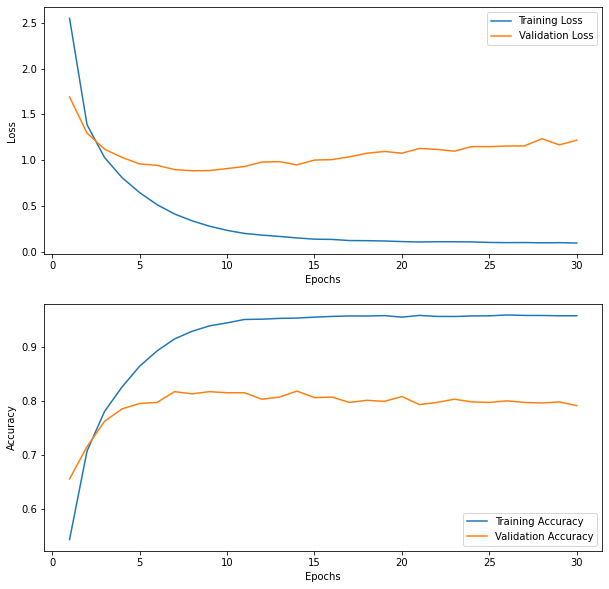

In [93]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

ax1.plot(epochs, loss, label="Training Loss")
ax1.plot(epochs, val_loss, label="Validation Loss")
ax1.set(xlabel="Epochs", ylabel="Loss")
ax1.legend()

ax2.plot(epochs, accuracy, label="Training Accuracy")
ax2.plot(epochs, val_accuracy, label="Validation Accuracy")
ax2.set(xlabel="Epochs", ylabel="Accuracy")
ax2.legend()

plt.show()

### Observations

- The network seems to overfit after `9` epochs.
- Let's retrain a new network for `9` epochs on the full train dataset
- After training we evaluate it on the `test` dataset

In [141]:
model = models.Sequential()

model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

history = model.fit(x_train, one_hot_train_labels, batch_size=512, epochs=9)

Epoch 1/9
18/18 [==============================] - 1s 12ms/step - loss: 2.4529 - accuracy: 0.5576
Epoch 2/9
18/18 [==============================] - 0s 12ms/step - loss: 1.3002 - accuracy: 0.7276
Epoch 3/9
18/18 [==============================] - 0s 12ms/step - loss: 0.9639 - accuracy: 0.7988
Epoch 4/9
18/18 [==============================] - 0s 12ms/step - loss: 0.7488 - accuracy: 0.8455
Epoch 5/9
18/18 [==============================] - 0s 12ms/step - loss: 0.5906 - accuracy: 0.8781
Epoch 6/9
18/18 [==============================] - 0s 12ms/step - loss: 0.4656 - accuracy: 0.9043
Epoch 7/9
18/18 [==============================] - 0s 12ms/step - loss: 0.3771 - accuracy: 0.9203
Epoch 8/9
18/18 [==============================] - 0s 12ms/step - loss: 0.3110 - accuracy: 0.9311
Epoch 9/9
18/18 [==============================] - 0s 13ms/step - loss: 0.2645 - accuracy: 0.9420


In [100]:
model.evaluate(x_test, one_hot_test_labels, return_dict=True)

71/71 [==============================] - 0s 1ms/step - loss: 0.9455 - accuracy: 0.7943


{'loss': 0.945479691028595, 'accuracy': 0.7943009734153748}

#### Observations

- Our model achieves an accuracy of `79%`
- How do we know what's the baseline performance for a dataset with `46` labels?
- That is, if we are to predict `46` labels at random what accuracy can we achieve?

    We can actually try that out manually. Let's go

In [128]:
import copy


def get_baseline_accuracy(test_labels, n=100):

    test_labels_copy = copy.copy(test_labels)
    accs = []

    for _ in range(n):
        np.random.shuffle(test_labels_copy)
        hits = test_labels_copy == test_labels
        avg_hits = np.sum(hits) / len(test_labels)
        accs.append(avg_hits)

    return sum(accs) / n

In [140]:
get_baseline_accuracy(test_labels)

0.1874577025823687

That is close to `19%!` 

So how did this work? 

- We simply shuffled the `test_labels` and tried to `match` them with the original dataset
- We do this around `100` times to get a decent average. 

**So we have a decent accuracy of 79% which supersedes any random baseline model by a decent margin**

### Predict

In [142]:
y_pred = model.predict(x_test)

In [146]:
y_pred[0].shape

(46,)

This is a probability distribution across all `46` classes. Let's verify if the sum is equal to `1`

In [147]:
sum(y_pred[0])

0.9999997535178409

In [148]:
np.argmax(y_pred[0])

3

### The End